In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lightgbm as lg
import xgboost as xgb

from cubist import Cubist
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor # GBM
from sklearn.metrics import *

%config InlineBackend.figure_format = 'retina' # plot 해상도 업

### Data loda

In [16]:
train_row = pd.read_csv('data/train_dataset.csv')
test_row = pd.read_csv('data/test_dataset_v01.csv')

In [17]:
print(train_row.shape)
print(test_row.shape)

(3664, 25)
(2441, 24)


In [18]:
train_row.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [19]:
test_row.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [20]:
train_row.drop('Unnamed: 0', axis=1, inplace=True)
test_row.drop('Unnamed: 0', axis=1, inplace=True)

### 원본 데이터 copy

In [21]:
train = train_row.copy()
test = test_row.copy()

In [22]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [23]:
test.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,97,0,80.0,17.0,17.0,4,0,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,37,0,22.0,15.0,15.0,3,1,0,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,44,0,NaN,20.0,20.0,3,3,0,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,40,0,14.0,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,43,2,NaN,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


### EDA

In [24]:
train['Result_v1'].value_counts()

benign       1858
malicious    1806
Name: Result_v1, dtype: int64

In [33]:
# target (정상 > 불량) : (0, 1)로 변환 
train.replace({'Result_v1' :'malicious'}, 0, inplace=True)
train.replace({'Result_v1' 'benign'}, 1, inplace=True)

In [35]:
train['Result_v1'].value_counts()

1    1858
0    1806
Name: Result_v1, dtype: int64

In [37]:
# 결측치 파악 
# - Boruta 알고리즘을 사용할 때는 결측치가 있으면 안 됨. 

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   int64  
 1   url_num_hyphens_dom      2441 non-null   int64  
 2   url_path_len             1975 non-null   float64
 3   url_domain_len           1975 non-null   float64
 4   url_hostname_len         1978 non-null   float64
 5   url_num_dots             2441 non-null   int64  
 6   url_num_underscores      2441 non-null   int64  
 7   url_query_len            2441 non-null   int64  
 8   url_num_query_para       2441 non-null   int64  
 9   url_ip_present           2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  url_chinese_present      2441 non-null   int64  
 12  url_port                 2441 non-null   int64  
 13  html_num_tags('iframe')  2441 non-null   int64  
 14  html_num_tags('script') 

In [40]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [41]:
test.isna().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64

In [43]:
# 논문에서는 선형 보간으로 채웠음
from scipy import interpolate

In [45]:
train.interpolate(method='values', inplace=True)
test.interpolate(method='values', inplace=True)

In [47]:
print(train.isna().sum())
print(test.isna().sum())

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
u

In [49]:
train.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')

In [51]:
import seaborn as sns

C:\Users\lab_user\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\lab_user\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


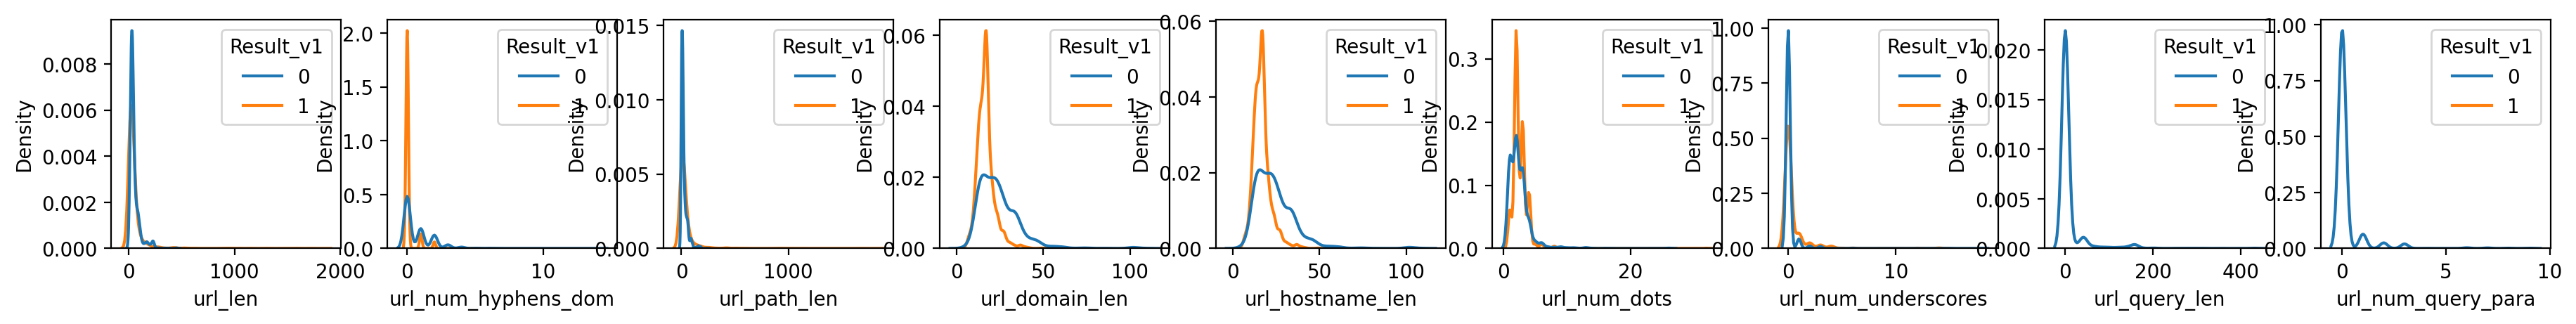

In [61]:
plt.figure(figsize=(30, 30))

plt.subplot(12,12, 1)
sns.kdeplot(data=train, x='url_len', hue='Result_v1')

plt.subplot(12,12, 2)
sns.kdeplot(data=train, x='url_num_hyphens_dom', hue='Result_v1')

plt.subplot(12, 12, 3)
sns.kdeplot(data=train, x='url_path_len', hue='Result_v1')

plt.subplot(12, 12, 4)
sns.kdeplot(data=train, x='url_domain_len', hue='Result_v1')

plt.subplot(12, 12, 5)
sns.kdeplot(data=train, x='url_hostname_len', hue='Result_v1')

plt.subplot(12, 12, 6)
sns.kdeplot(data=train, x='url_num_dots', hue='Result_v1')

plt.subplot(12, 12, 7)
sns.kdeplot(data=train, x='url_num_underscores', hue='Result_v1')

plt.subplot(12,12, 8)
sns.kdeplot(data=train, x='url_query_len', hue='Result_v1')

plt.subplot(12,12, 9)
sns.kdeplot(data=train, x='url_num_query_para', hue='Result_v1')

plt.show()

In [62]:
# 정상과 불량 간의 차이가 있는가? 
# - 정상 데이터

train['Result_v1'].value_counts()

1    1858
0    1806
Name: Result_v1, dtype: int64